In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from datetime import datetime

# Read the CSV into a Pandas DataFrame
intake_csv = "Resources/Austin_Animal_Center_Intakes.csv"
outcome_csv= "Resources/Austin_Animal_Center_Outcomes.csv"

# Read the CSV into a Pandas DataFrame and convert to datetime64

intake_df = pd.read_csv(intake_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])
outcome_df = pd.read_csv(outcome_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])

#update intake file with column reflecting number of intakes
#and select outcomes for animals with 1 or 2 intakes
intake_counts=intake_df.groupby(['Animal ID']).size().reset_index(name='counts')
intake_df=pd.merge(intake_df, intake_counts, on="Animal ID", how="outer")
reduced_intake_df=intake_df.query('counts <3')

#update outtake file with column reflecting number of intakes per animal
#and select outcomes for animals with 1 or 2 intakes
outcome_df=pd.merge(outcome_df, intake_counts, on="Animal ID", how="left")
reduced_outcome_df=outcome_df.query('counts <3')
#reduced_outcome_df=reduced_outcome_df.drop(columns=['counts'])



In [2]:
outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [3]:
reduced_outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [4]:
#now take single intake animals and match with any available outcome
reduced_intake_only_one_df=reduced_intake_df.query('counts <2')
#reduced_intake_only_one_df=reduced_intake_only_one_df.add_prefix('IN_')
reduced_outcome_df=reduced_outcome_df.add_prefix("OUT_")

reduced_intake_only_one_df=reduced_intake_only_one_df.rename(index=str,columns={"IN_Animal ID": "Animal ID"})
reduced_outcome_df=reduced_outcome_df.rename(index=str,columns={"OUT_Animal ID": "Animal ID"})
one_intake_merged=pd.merge(reduced_intake_only_one_df, reduced_outcome_df, on="Animal ID", how="left")

In [5]:
one_intake_merged["num_of_intakes_for_ID"]=1

In [6]:
#now take two intake animals and figure out order of intakes and outcomes
reduced_intake_two_df=reduced_intake_df.query('counts !=1')


In [7]:
reduced_intake_two_first_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_intake_two_first_date_lookup_df = reduced_intake_two_first_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_first_date_lookup_df["stay_number"]=1
reduced_intake_two_first_date_lookup_df.columns = reduced_intake_two_first_date_lookup_df.columns.droplevel(1)


reduced_intake_two_first_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03 17:55:00,1
1,A282897,2013-11-21 13:45:00,1
2,A287017,2014-12-12 07:04:00,1
3,A304036,2015-06-06 14:34:00,1
4,A307010,2016-09-25 12:51:00,1


In [8]:
reduced_intake_two_second_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['max']).reset_index()
reduced_intake_two_second_date_lookup_df = reduced_intake_two_second_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_second_date_lookup_df["stay_number"]=2
reduced_intake_two_second_date_lookup_df.columns = reduced_intake_two_second_date_lookup_df.columns.droplevel(1)

In [9]:
reduced_intake_two_second_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2015-05-20 22:34:00,2
1,A282897,2015-07-06 15:06:00,2
2,A287017,2015-08-16 12:19:00,2
3,A304036,2016-04-19 08:22:00,2
4,A307010,2017-06-01 11:47:00,2


In [10]:
multiple_intakes_order_lookup = reduced_intake_two_first_date_lookup_df.append(reduced_intake_two_second_date_lookup_df)

In [11]:
#multiple_intakes_order_lookup

In [12]:
#reduced_intake_two_df

reduced_intake_two_df=pd.merge(reduced_intake_two_df, multiple_intakes_order_lookup, on=["Animal ID","DateTime"], how="left")
#reduced_intake_two_df

In [13]:
#look at outcome records for the two-intake group and determine order

In [14]:
#reduced_outcome_df

In [15]:

reduced_outcome_two_first_date_lookup_df=reduced_outcome_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_outcome_two_first_date_lookup_df = reduced_outcome_two_first_date_lookup_df[['Animal ID','OUT_DateTime']]
reduced_outcome_two_first_date_lookup_df["stay_number"]=1
reduced_outcome_two_first_date_lookup_df.columns = reduced_outcome_two_first_date_lookup_df.columns.droplevel(1)


reduced_outcome_two_first_date_lookup_df.head()

,Animal ID,OUT_DateTime,stay_number
0,A047759,2014-04-07 15:12:00,1
1,A134067,2013-11-16 11:54:00,1
2,A141142,2013-11-17 11:40:00,1
3,A163459,2014-11-14 19:28:00,1
4,A165752,2014-09-15 16:35:00,1


In [16]:
reduced_outcome_df=pd.merge(reduced_outcome_df, reduced_outcome_two_first_date_lookup_df, on=["Animal ID","OUT_DateTime"], how="left")

reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,NaN
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0,1.0


In [17]:
reduced_outcome_df['stay_number']=reduced_outcome_df['stay_number'].fillna(2)
#reduced_outcome_df

In [18]:
#reduced_intake_two_df=reduced_intake_two_df.add_prefix('IN_')
reduced_intake_two_df=reduced_intake_two_df.rename(index=str,columns={"IN_Animal ID": "Animal ID","IN_stay_number":"stay_number"})
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21 12:16:00,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15 15:38:00,2014-07-15 15:38:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17 14:21:00,2014-12-17 14:21:00,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20 17:22:00,2016-08-20 17:22:00,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17 11:26:00,2017-05-17 11:26:00,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29 13:32:00,2016-12-29 13:32:00,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28 14:23:00,2018-06-28 14:23:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28 12:39:00,2017-10-28 12:39:00,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27 14:35:00,2015-01-27 14:35:00,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02 15:15:00,2016-05-02 15:15:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [19]:
#merge the multiple intake with coressponsing outcomes - will not yield two outcomes for animals still in residence
two_intakes_merged=pd.merge(reduced_intake_two_df, reduced_outcome_df, on=["Animal ID", "stay_number"], how="left")
two_intakes_merged["num_of_intakes_for_ID"]="2"

In [20]:
two_intakes_merged


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A683798,Mustachala,2016-07-21 12:16:00,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,...,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2.0,2
1,A683798,Mustachala,2014-07-15 15:38:00,2014-07-15 15:38:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,...,01/15/2013,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair Mix,White/Black,2.0,2
2,A663489,Precious,2014-12-17 14:21:00,2014-12-17 14:21:00,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
3,A663489,Precious,2016-08-20 17:22:00,2016-08-20 17:22:00,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
4,A741209,*Girly,2017-05-17 11:26:00,2017-05-17 11:26:00,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Adoption,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,White,2.0,2
5,A741209,*Girly,2016-12-29 13:32:00,2016-12-29 13:32:00,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Return to Owner,NaN,Dog,Intact Female,1 year,Pit Bull Mix,White,2.0,2
6,A761051,Bluebell,2018-06-28 14:23:00,2018-06-28 14:23:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
7,A761051,Bluebell,2017-10-28 12:39:00,2017-10-28 12:39:00,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
8,A696008,Gunnar,2015-01-27 14:35:00,2015-01-27 14:35:00,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,...,11/12/2014,Adoption,NaN,Dog,Neutered Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2.0,2
9,A696008,Gunnar,2016-05-02 15:15:00,2016-05-02 15:15:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,...,11/12/2014,Return to Owner,NaN,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2.0,2


In [21]:
one_intake_merged

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A748291,*Madison,2017-05-01 14:26:00,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,...,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,1.0,1
1,A750529,NaN,2017-05-28 13:22:00,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,...,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream,1.0,1
2,A730601,NaN,2016-07-07 12:11:00,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,...,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby,1.0,1
3,A748238,NaN,2017-05-01 10:53:00,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,...,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White,1.0,1
4,A683644,*Zoey,2014-07-13 11:02:00,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,...,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White,1.0,1
5,A676515,Rico,2014-04-11 08:45:00,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,...,01/11/2014,Return to Owner,NaN,Dog,Neutered Male,3 months,Pit Bull Mix,White/Brown,1.0,1
6,A679549,*Gilbert,2014-05-22 15:43:00,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,1.0,1
7,A683656,NaN,2014-07-13 13:20:00,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,04/13/2014,Adoption,NaN,Cat,Neutered Male,3 months,Snowshoe Mix,Lynx Point,1.0,1
8,A709749,*Janeane,2015-08-12 18:29:00,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,1 year,...,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,1.0,1
9,A773634,Augie,2018-06-03 15:26:00,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,...,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,Dachshund Mix,Red,1.0,1


In [22]:
working_base_master=one_intake_merged.append(two_intakes_merged, ignore_index=True)

C:\Users\ellen\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [23]:
working_base_master

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_MonthYear,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,2017-09-04 00:00:00,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,2017-06-01 16:42:00,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,2016-07-08 09:00:00,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,2017-05-06 15:57:00,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13 11:02:00,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,2014-11-06 10:06:00,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,2014-04-14 18:38:00,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,2014-06-16 13:54:00,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,2014-07-17 16:57:00,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,2015-09-22 12:49:00,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,2018-06-05 11:39:00,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN


In [24]:
working_base_master['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']

In [25]:
#working_base_master['time_to_exit']=working_base_master['time_to_exit'] / np.timedelta64(1, 'D')

In [26]:
working_base_master['time_to_exit'].dtype


dtype('<m8[ns]')

In [27]:
working_base_master

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,125 days 09:34:00
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4 days 03:20:00
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,0 days 20:49:00
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5 days 05:04:00
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13 11:02:00,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,115 days 23:04:00
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3 days 09:53:00
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,24 days 22:11:00
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4 days 03:37:00
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,40 days 18:20:00
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,1 days 20:13:00


In [28]:
#working_base_master['time_to_exit']=pd.to_datetime(working_base_master['time_to_exit'])
working_base_master.dtypes


Age upon Intake                   object
Animal ID                         object
Animal Type                       object
Breed                             object
Color                             object
DateTime                  datetime64[ns]
Found Location                    object
Intake Condition                  object
Intake Type                       object
MonthYear                 datetime64[ns]
Name                              object
OUT_Age upon Outcome              object
OUT_Animal Type                   object
OUT_Breed                         object
OUT_Color                         object
OUT_Date of Birth                 object
OUT_DateTime              datetime64[ns]
OUT_MonthYear             datetime64[ns]
OUT_Name                          object
OUT_Outcome Subtype               object
OUT_Outcome Type                  object
OUT_Sex upon Outcome              object
OUT_counts                       float64
Sex upon Intake                   object
counts          

## Create DF with intake data for holiday analysis

In [29]:
q4df=pd.DataFrame(working_base_master[['Animal ID', "Animal Type", "DateTime"]])
q4df.dtypes


Animal ID              object
Animal Type            object
DateTime       datetime64[ns]
dtype: object

## Convert date time column to just dates


In [30]:
q4df["DateTime"]=q4df["DateTime"].dt.round("D")
q4df.head()

,Animal ID,Animal Type,DateTime
0,A748291,Dog,2017-05-02
1,A750529,Dog,2017-05-29
2,A730601,Cat,2016-07-08
3,A748238,Dog,2017-05-01
4,A683644,Dog,2014-07-13


# Group data YoY based on timeframe of Thanksgiving-New Years Day with cushion on either side to understand lead time

### Each year would be separate variable to later be combined

### Display dataframe to confirm window data

In [31]:
#pull data out for intakes between 11/1-1/14

start_date13="2013-11-20"
end_date13="2014-1-8"
Holiday_Window13 = (q4df['DateTime'] > start_date13) & (q4df['DateTime']  <= end_date13)
q4df_2013=q4df.loc[Holiday_Window13]

start_date14="2014-11-20"
end_date14="2015-1-8"
Holiday_Window14 = (q4df['DateTime'] > start_date14) & (q4df['DateTime']  <= end_date14)
q4df_2014=q4df.loc[Holiday_Window14]
q4df_2014

start_date15="2015-11-20"
end_date15="2016-1-8"
Holiday_Window15 = (q4df['DateTime'] > start_date15) & (q4df['DateTime']  <= end_date15)
q4df_2015=q4df.loc[Holiday_Window15]
q4df_2015

start_date16="2016-11-20"
end_date16="2017-1-8"
Holiday_Window16 = (q4df['DateTime'] > start_date16) & (q4df['DateTime']  <= end_date16)
q4df_2016=q4df.loc[Holiday_Window16]
q4df_2016

start_date17="2017-11-20"
end_date17="2018-1-8"
Holiday_Window17 = (q4df['DateTime'] > start_date17) & (q4df['DateTime']  <= end_date17)
q4df_2017=q4df.loc[Holiday_Window17]

q4df_2017.head()


,Animal ID,Animal Type,DateTime
21,A763217,Dog,2017-12-06
109,A763815,Dog,2017-12-17
132,A763933,Dog,2017-12-19
155,A763065,Cat,2017-12-03
170,A763109,Dog,2017-12-04


## Confirm Data types in new Data Frames with holiday time frames

In [32]:
q4df_2013.dtypes

Animal ID              object
Animal Type            object
DateTime       datetime64[ns]
dtype: object

## Determine occurrences of intake per day  using valuecounts of date column.

#### Then remove year from date column to later merge on month/day

In [33]:
#This is getting the amount of occurences of the date

datecounts_2013=q4df_2013['DateTime'].value_counts()
q4df_2013dict={"Date":datecounts_2013.index,
               "2013 intakes":datecounts_2013}
new13df=pd.DataFrame(q4df_2013dict)
new13df=new13df.sort_values('Date')
new13df.head()

datecounts_2014=q4df_2014["DateTime"].value_counts()
q4df_2014dict={"Date": datecounts_2014.index,
               "2014 intakes":datecounts_2014}
new14df=pd.DataFrame(q4df_2014dict)
new14df=new14df.sort_values('Date')
new14df.head()

datecounts_2015=q4df_2015["DateTime"].value_counts()
q4df_2015dict={"Date": datecounts_2015.index,
               "2015 intakes":datecounts_2015}
new15df=pd.DataFrame(q4df_2015dict)
new15df=new15df.sort_values('Date')
new15df.head()


datecounts_2016=q4df_2016["DateTime"].value_counts()
q4df_2016dict={"Date": datecounts_2016.index,
               "2016 intakes":datecounts_2016}
new16df=pd.DataFrame(q4df_2016dict)
new16df=new16df.sort_values('Date')
new16df.head()


datecounts_2017=q4df_2017["DateTime"].value_counts()
q4df_2017dict={"Date": datecounts_2017.index,
               "2017 intakes":datecounts_2017}
new17df=pd.DataFrame.from_dict(q4df_2017dict)
new17df=new17df.sort_values('Date')


new13df['Date']=new13df['Date'].astype(str).str[5:]
new14df['Date']=new14df['Date'].astype(str).str[5:]
new15df['Date']=new15df['Date'].astype(str).str[5:]
new16df['Date']=new16df['Date'].astype(str).str[5:]
new17df['Date']=new17df['Date'].astype(str).str[5:]

new17df.head()

,Date,2017 intakes
2017-11-21,11-21,47
2017-11-22,11-22,40
2017-11-23,11-23,19
2017-11-24,11-24,10
2017-11-25,11-25,28


## Merge YoY data to one dataframe

In [34]:
YoY_Total_Intake_Combined=pd.merge(new13df, new14df, on="Date")
YoY_Total_Intake_Combined=pd.merge(YoY_Total_Intake_Combined, new15df, on="Date")
YoY_Total_Intake_Combined=pd.merge(YoY_Total_Intake_Combined, new16df, on="Date")
YoY_Total_Intake_Combined=pd.merge(YoY_Total_Intake_Combined, new17df, on="Date")
YoY_Total_Intake_Combined.head()

,Date,2013 intakes,2014 intakes,2015 intakes,2016 intakes,2017 intakes
0,11-21,31,40,39,46,47
1,11-22,33,52,43,31,40
2,11-23,31,53,60,33,19
3,11-24,44,53,38,22,10
4,11-25,38,34,38,12,28


## Import matplotlib for visuals

In [35]:
import matplotlib.pyplot as plt

## Set index in combined dataframe and confirm data types

In [36]:
#biggestdf.dtypes
YoY_Total_Intake_Combined=YoY_Total_Intake_Combined.set_index(YoY_Total_Intake_Combined['Date'])

In [37]:
type(YoY_Total_Intake_Combined)
YoY_Total_Intake_Combined.dtypes

Date            object
2013 intakes     int64
2014 intakes     int64
2015 intakes     int64
2016 intakes     int64
2017 intakes     int64
dtype: object

## Create bar chart with YoY data to compare. 

#### Use subplot function to split data into separate comparable graphs
#### Save .png of charts

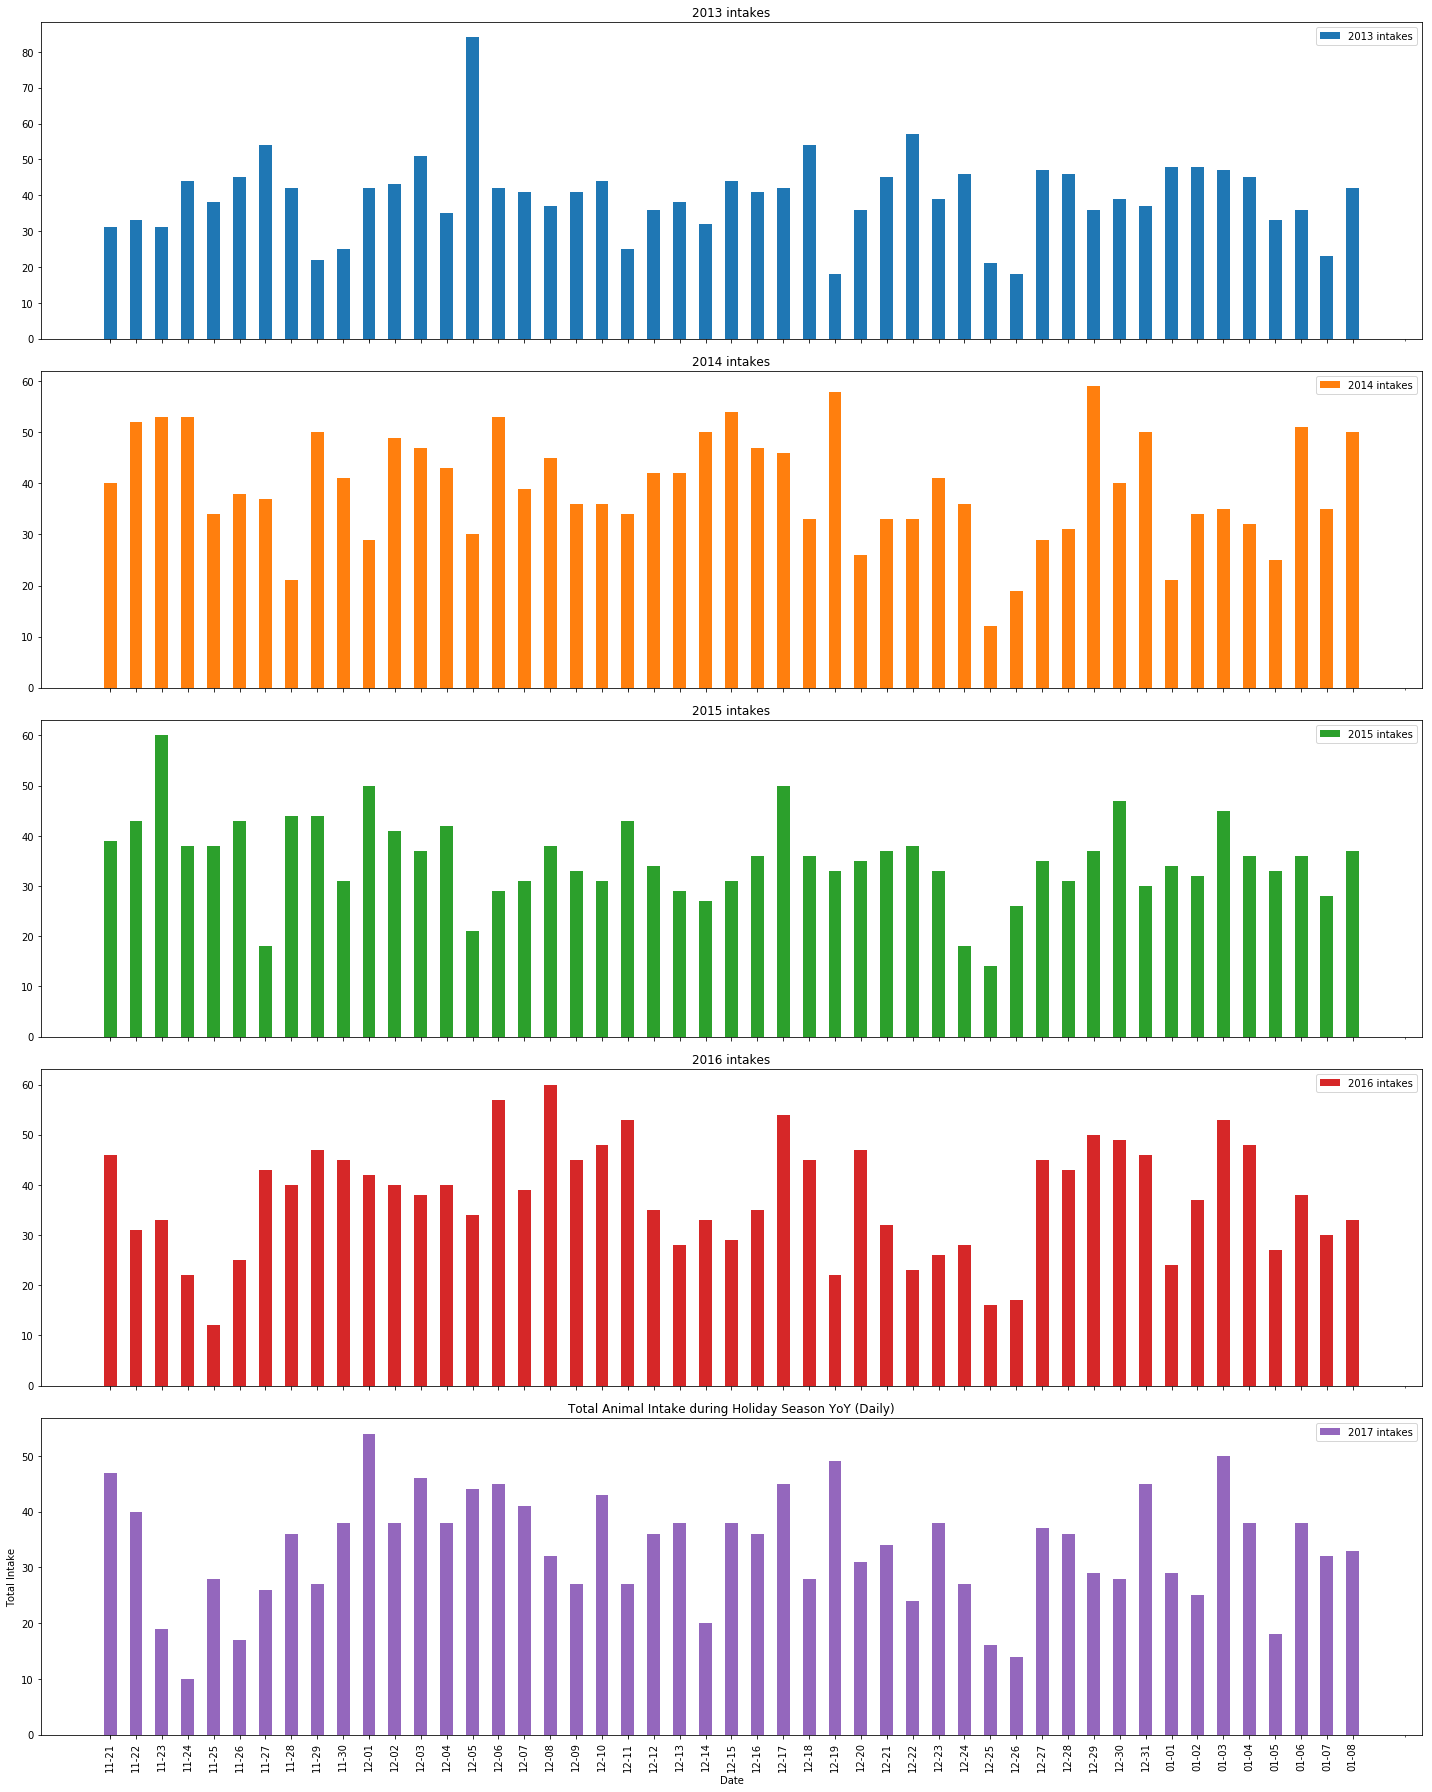

In [38]:

YoY_Total_Intake_Combined.plot(kind='bar', figsize=(20,25), subplots=5)

plt.title("Total Animal Intake during Holiday Season YoY (Daily)")
plt.xlabel("Date")
plt.ylabel("Total Intake")
plt.autoscale(enable=True, axis='both')

plt.tight_layout()
plt.savefig("../gitpug/Images/Total Intake YoY Bar (Daily).png", dpi=1020)

## Create Line chart to compare YoY data layered

#### use separate yearly dataframes to layer data
#### save .png of chart

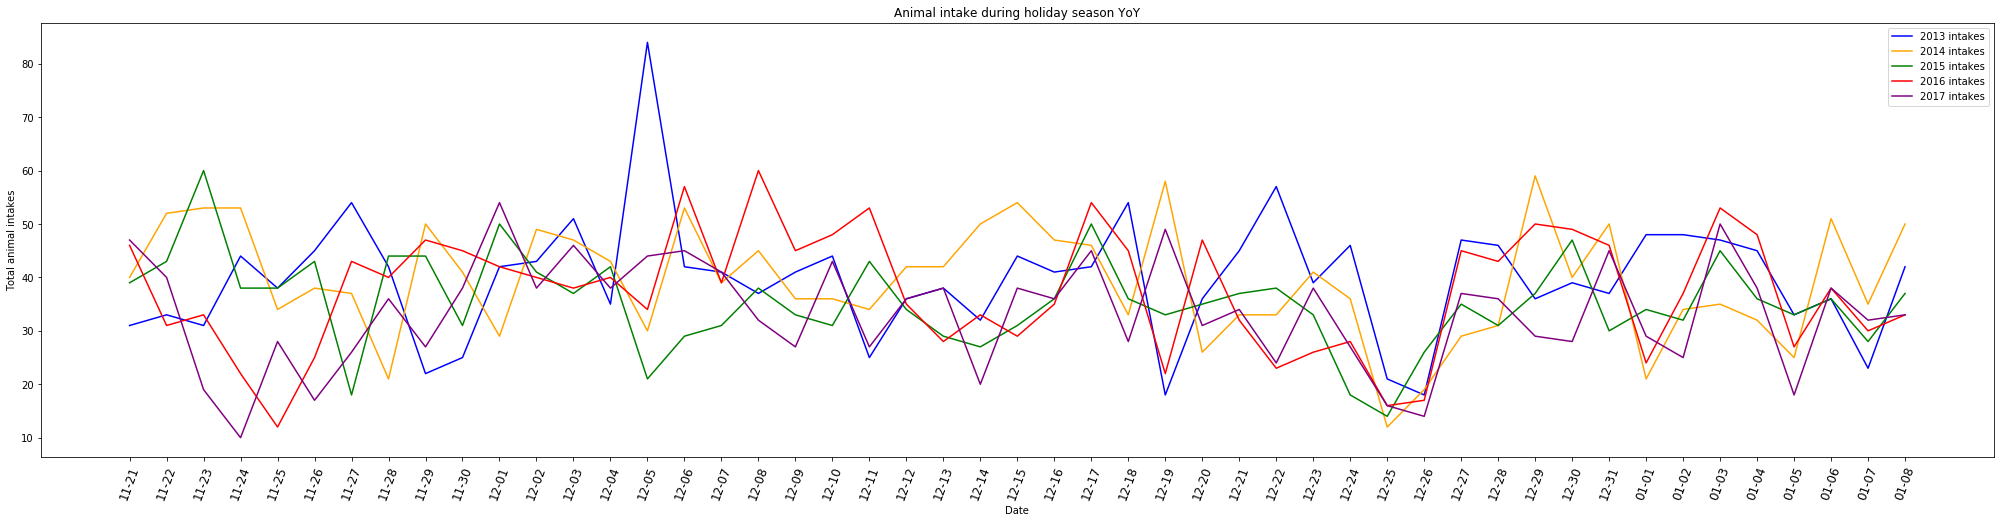

In [39]:
plt.figure(figsize=(35,8))
plt.tight_layout()
plt.plot(new13df['Date'], new13df['2013 intakes'],color='blue')
plt.plot(new14df['Date'], new14df['2014 intakes'],color='orange')
plt.plot(new15df['Date'], new15df['2015 intakes'], color='green')
plt.plot(new16df['Date'], new16df['2016 intakes'],color='red')
plt.plot(new17df['Date'], new17df['2017 intakes'],color='purple')
plt.legend()
plt.title("Animal intake during holiday season YoY")
plt.xlabel("Date")
plt.ylabel("Total animal intakes")
plt.xticks(YoY_Total_Intake_Combined['Date'], rotation=70, size='large')


plt.autoscale(enable=True, axis='both')
plt.savefig("../gitpug/Images/Total Intake YoY Line (Daily).png", dpi=1020, bbox_inches='tight')

## Break out Animal Type data to see if Higher intake rate of specific animal type collectively over holiday season

#### Create separate dataframes for each year to sum animal type counts

In [40]:
DateTime_2013=q4df_2013["DateTime"]
AnimalType_2013=q4df_2013['Animal Type']

q4df_2013_2 = pd.DataFrame({'DateTime':DateTime_2013, 
                  'Animal Type':AnimalType_2013,
                  '2013 Counts':""})

q4df_2013_2=q4df_2013_2.groupby(["DateTime", 'Animal Type']).count()
q4df_2013_2=q4df_2013_2.groupby('Animal Type')
q4df_2013_2=q4df_2013_2.sum()
q4df_2013_2.head()


DateTime_2014=q4df_2014["DateTime"]
AnimalType_2014=q4df_2014['Animal Type']

q4df_2014_2 = pd.DataFrame({'DateTime':DateTime_2014, 
                  'Animal Type':AnimalType_2014,
                  '2014 Counts':""})

q4df_2014_2=q4df_2014_2.groupby(["DateTime", 'Animal Type']).count()
q4df_2014_2=q4df_2014_2.groupby('Animal Type')
q4df_2014_2=q4df_2014_2.sum()
q4df_2014_2.head()


DateTime_2015=q4df_2015["DateTime"]
AnimalType_2015=q4df_2015['Animal Type']

q4df_2015_2 = pd.DataFrame({'DateTime':DateTime_2015, 
                  'Animal Type':AnimalType_2015,
                  '2015 Counts':""})

q4df_2015_2=q4df_2015_2.groupby(["DateTime", 'Animal Type']).count()
q4df_2015_2=q4df_2015_2.groupby('Animal Type')
q4df_2015_2=q4df_2015_2.sum()
q4df_2015_2.head()


DateTime_2016=q4df_2016["DateTime"]
AnimalType_2016=q4df_2016['Animal Type']

q4df_2016_2 = pd.DataFrame({'DateTime':DateTime_2016, 
                  'Animal Type':AnimalType_2016,
                  '2016 Counts':""})

q4df_2016_2=q4df_2016_2.groupby(["DateTime", 'Animal Type']).count()
q4df_2016_2=q4df_2016_2.groupby('Animal Type')
q4df_2016_2=q4df_2016_2.sum()
q4df_2016_2.head()

DateTime_2017=q4df_2017["DateTime"]
AnimalType_2017=q4df_2017['Animal Type']

q4df_2017_2 = pd.DataFrame({'DateTime':DateTime_2017, 
                  'Animal Type':AnimalType_2017,
                  '2017 Counts':""})

q4df_2017_2=q4df_2017_2.groupby(["DateTime", 'Animal Type']).count()
q4df_2017_2=q4df_2017_2.groupby('Animal Type')
q4df_2017_2=q4df_2017_2.sum()
q4df_2017_2.head()


,2017 Counts
Animal Type,
Bird,3
Cat,504
Dog,1070
Livestock,1
Other,57


## Merge Animal Type YoY counts to single dataframe based on Animal Type

In [41]:
Animal_Intake_Type_Combined=pd.merge(q4df_2013_2, q4df_2014_2, on="Animal Type")
Animal_Intake_Type_Combined=pd.merge(Animal_Intake_Type_Combined, q4df_2015_2, on="Animal Type")
Animal_Intake_Type_Combined=pd.merge(Animal_Intake_Type_Combined, q4df_2016_2, on="Animal Type")
Animal_Intake_Type_Combined=pd.merge(Animal_Intake_Type_Combined, q4df_2017_2, on="Animal Type")

Animal_Intake_Type_Combined.head()

,2013 Counts,2014 Counts,2015 Counts,2016 Counts,2017 Counts
Animal Type,,,,,
Bird,2,7,3,15,3
Cat,507,541,552,618,504
Dog,1322,1309,1124,1122,1070
Other,112,67,53,78,57


## Create YoY Bar chart comparison for animal types and total intake over season

#### save .png of chart

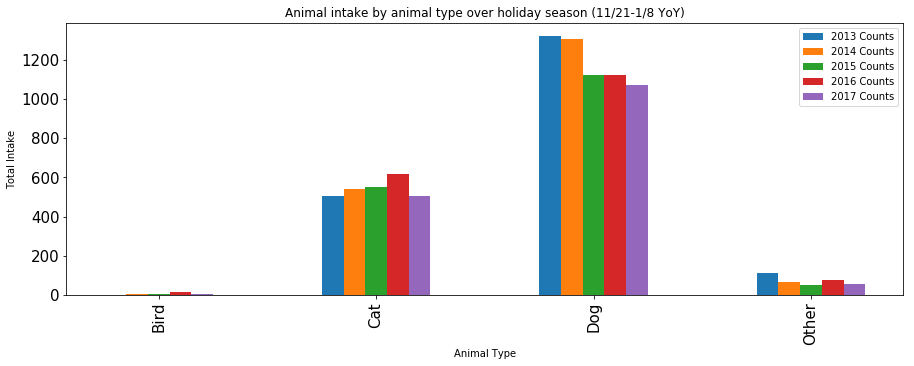

In [42]:
Animal_Intake_Type_Combined.plot(kind='bar', figsize=(15,5), title='Animal intake by animal type over holiday season (11/21-1/8 YoY)', 
                fontsize= 15 )

plt.xlabel("Animal Type")
plt.ylabel("Total Intake")

plt.autoscale(enable=True, axis='both')
plt.savefig("../gitpug/Images/Total Intake by Animal Type Bar.png", dpi=1020, bbox_inches='tight')